#  🛠️ **Setting Up the Environment**

In [150]:
!pip install -q streamlit pyngrok pandas numpy matplotlib seaborn plotly scikit-learn

AUTH_TOKEN = "2zBh1h7Y0HCjtMBmJklEPRWvckQ_2bjv1Q37oMRBe4Ptuz4i2"
!ngrok authtoken {AUTH_TOKEN}
print("ngrok authtoken configured.")

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
ngrok authtoken configured.


# 📚 **Importing Essential Libraries**

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# 📂 **Loading the Dataset**

In [152]:
# Define the correct column names in order
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'gender',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Load the dataset correctly, skipping the file's own header row
data = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/adult.csv',
    names=column_names,
    sep=', *',
    skiprows=1,  # This is the crucial addition
    engine='python'
)

# Verify that the columns and data types are now correct
print("Dataset loaded successfully. ✅")
display(data.head())
print("\nData Types:")
print(data.info())

Dataset loaded successfully. ✅


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K



Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


# 📊 **Initial Data Overview**

In [153]:
rows, cols = data.shape
print(f"There are {rows} rows and {cols} columns in the dataset. 📊")

print("\nHere's a glimpse of the raw dataset ✨\n")
display(data)

There are 48842 rows and 15 columns in the dataset. 📊

Here's a glimpse of the raw dataset ✨



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 📜**Displaying Series containing the frequency of each distinct row in the Dataframe**

In [154]:
display(data.value_counts())

age  workclass  fnlwgt  education     education-num  marital-status      occupation         relationship   race   gender  capital-gain  capital-loss  hours-per-week  native-country  income
25   Private    308144  Bachelors     13             Never-married       Craft-repair       Not-in-family  White  Male    0             0             40              Mexico          <=50K     3
                195994  1st-4th       2              Never-married       Priv-house-serv    Not-in-family  White  Female  0             0             40              Guatemala       <=50K     3
21   Private    243368  Preschool     1              Never-married       Farming-fishing    Not-in-family  White  Male    0             0             50              Mexico          <=50K     3
39   Private    184659  HS-grad       9              Married-civ-spouse  Machine-op-inspct  Husband        White  Male    0             0             40              United-States   <=50K     2
45   Private    82797   Bachelors     13             Married-civ-spouse  Exec-managerial    Husband        White  Male    0             0             45              United-States   >50K      2
                                                                                                                                                                                               ..
31   Private    156464  10th          6              Divorced            Other-service      Not-in-family  White  Male    0             0             40              United-States   <=50K     1
                        Bachelors     13             Never-married       Prof-specialty     Own-child      White  Male    0             0             25              United-States   <=50K     1
                156493  HS-grad       9              Never-married       Prof-specialty     Own-child      White  Male    0             0             40              United-States   <=50K     1
                        Some-college  10             Married-civ-spouse  Exec-managerial    Husband        White  Male    0             0             40              United-States   >50K      1
                152940  Some-college  10             Married-civ-spouse  Craft-repair       Husband        White  Male    0             0             40              United-States   <=50K     1
Name: count, Length: 48790, dtype: int64

# ❓ **Checking for Missing Values**

In [155]:
print("\nChecking for null values:")
print(data.isnull().sum())


Checking for null values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


# 📝 **Categorical Feature Summary**

In [156]:
# Visualize distributions of categorical features
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('income') # Exclude target variable

fig = make_subplots(
    rows=4,
    cols=2,
    subplot_titles=categorical_columns
)

for i, col_name in enumerate(categorical_columns):
    counts = data[col_name].value_counts()
    row = (i // 2) + 1
    col = (i % 2) + 1
    fig.add_trace(go.Bar(x=counts.index, y=counts.values, name=col_name), row=row, col=col)

fig.update_layout(
    title_text="Categorical Data Distributions",
    height=1000,
    template='plotly_white',
    showlegend=False
)
fig.show()

# 🔢 **Identifying '?' Values**

In [157]:
columns_with_question_marks = []
for col in data.columns:
    if (data[col] == '?').any():
        columns_with_question_marks.append(col)

if columns_with_question_marks:
    print("Columns with '?' values:")
    for col in columns_with_question_marks:
        print(f"- {col}")
else:
    print("No columns found with '?' values.")

Columns with '?' values:
- workclass
- occupation
- native-country


# 🔢 **Quantifying '?' values in identified columns**

In [158]:
columns_with_question_marks = ['workclass', 'occupation', 'native-country']

print("Quantifying '?' values in identified columns:")
for col in columns_with_question_marks:
    count_question_marks = (data[col] == '?').sum()
    percentage_question_marks = (count_question_marks / len(data)) * 100
    print(f"- '{col}': {count_question_marks} '?' values ({percentage_question_marks:.2f}%)")

Quantifying '?' values in identified columns:
- 'workclass': 2799 '?' values (5.73%)
- 'occupation': 2809 '?' values (5.75%)
- 'native-country': 857 '?' values (1.75%)


# 🔄 **Imputing '?' Values with Mode**

In [159]:
columns_to_impute = ['workclass', 'occupation', 'native-country']

for col in columns_to_impute:
    # Calculate the mode of the column
    mode_value = data[col].mode()[0]
    # Replace '?' with the mode
    data[col] = data[col].replace('?', mode_value)
    print(f"Replaced '?' with '{mode_value}' in column '{col}'")

# Verify that '?' values are gone
print("\nVerifying no '?' values remain:")
for col in columns_to_impute:
    count_question_marks = (data[col] == '?').sum()
    print(f"- '{col}': {count_question_marks} '?' values remaining")

Replaced '?' with 'Private' in column 'workclass'
Replaced '?' with 'Prof-specialty' in column 'occupation'
Replaced '?' with 'United-States' in column 'native-country'

Verifying no '?' values remain:
- 'workclass': 0 '?' values remaining
- 'occupation': 0 '?' values remaining
- 'native-country': 0 '?' values remaining


# 🧹**Handling Low-Count Categories**

In [160]:
# Identify low-count categories (less than 100 occurrences)
low_count_categories = {}
for col in ['workclass', 'education', 'marital-status', 'occupation']:#
    counts = data[col].value_counts()
    low_counts = counts[counts < 100]
    if not low_counts.empty:
        low_count_categories[col] = low_counts

# Create a list of categories to remove for each column
categories_to_remove = {}
for col, counts in low_count_categories.items():
    categories_to_remove[col] = counts.index.tolist()

print("Shape of the DataFrame before removing low-count categories:", data.shape)

# Remove rows where the column value is in the list of categories to remove for that column
for col, categories in categories_to_remove.items():
    data = data[~data[col].isin(categories)]

print("Shape of the DataFrame after removing low-count categories:", data.shape)

print("\nCategories removed based on the threshold of 100:")
for col, categories in categories_to_remove.items():
    print(f"- From column '{col}': {categories}")

Shape of the DataFrame before removing low-count categories: (48842, 15)
Shape of the DataFrame after removing low-count categories: (48676, 15)

Categories removed based on the threshold of 100:
- From column 'workclass': ['Without-pay', 'Never-worked']
- From column 'education': ['Preschool']
- From column 'marital-status': ['Married-AF-spouse']
- From column 'occupation': ['Armed-Forces']


# ✂️ **Dropping 'education' Column**

In [161]:
# Drop the 'education' column
data = data.drop('education', axis=1)

print("\nDataFrame after dropping 'education' column:")
display(data.head())


DataFrame after dropping 'education' column:


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


# 📊 **Visualizing Numerical Feature Distributions**

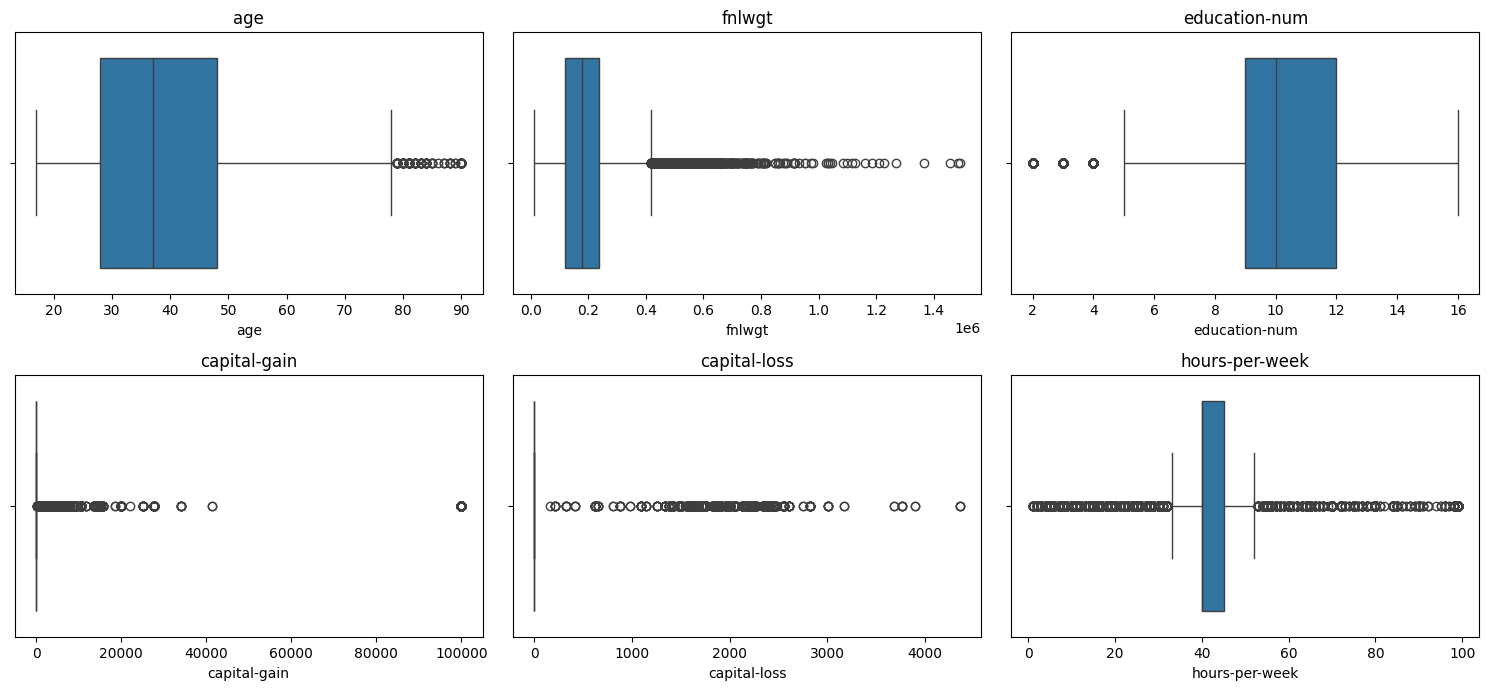

In [162]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns

# Create box plots for numerical columns to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Changed from 2x3 to 3x3
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# 📉 **Handling Outliers with IQR Capping**

Outliers in 'age' have been capped.
Outliers in 'fnlwgt' have been capped.
Outliers in 'education-num' have been capped.
Outliers in 'capital-gain' have been capped.
Outliers in 'capital-loss' have been capped.
Outliers in 'hours-per-week' have been capped.


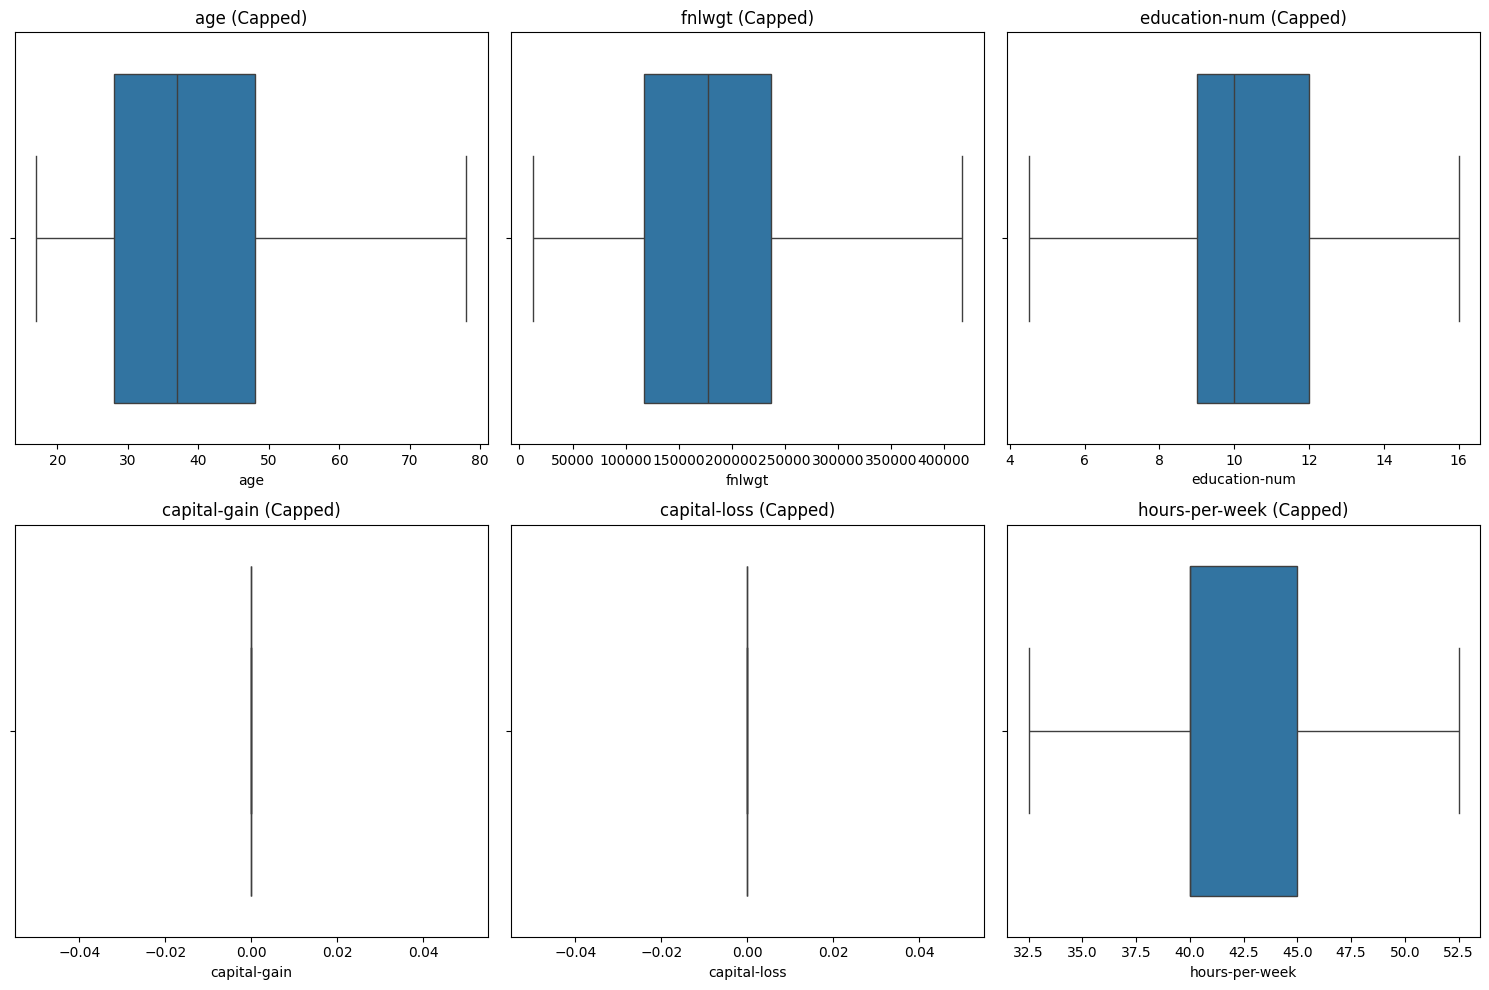

In [163]:
# Handle outliers using the IQR method (capping)

numerical_cols_with_outliers = ['age', 'fnlwgt', 'education-num' , 'capital-gain', 'capital-loss', 'hours-per-week']

for col in numerical_cols_with_outliers:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

    print(f"Outliers in '{col}' have been capped.")

# Verify by displaying box plots again
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_with_outliers):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'{col} (Capped)')
plt.tight_layout()
plt.show()

# ➕**Creating a New Feature: Net Capital Change**

In [164]:
# Create a new feature: net capital change
data['net-capital-change'] = data['capital-gain'] - data['capital-loss']

print("\nDataFrame with 'net-capital-change' column:")
display(data.head())


DataFrame with 'net-capital-change' column:


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,net-capital-change
0,25.0,Private,226802.0,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,0.0
1,38.0,Private,89814.0,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,0.0
2,28.0,Local-gov,336951.0,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,0.0
3,44.0,Private,160323.0,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.0,0.0,40.0,United-States,>50K,0.0
4,18.0,Private,103497.0,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,32.5,United-States,<=50K,0.0


# 🏷️ **One-Hot Encoding Categorical Features**

In [165]:
# Select categorical columns (excluding the target variable 'income')
categorical_cols = data.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('income')

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("\nDataFrame after One-Hot Encoding:")
display(data_encoded.head())
print(f"\nShape of the encoded DataFrame: {data_encoded.shape}")


DataFrame after One-Hot Encoding:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,net-capital-change,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,226802.0,7.0,0.0,0.0,40.0,<=50K,0.0,False,True,...,False,False,False,False,False,False,False,True,False,False
1,38.0,89814.0,9.0,0.0,0.0,50.0,<=50K,0.0,False,True,...,False,False,False,False,False,False,False,True,False,False
2,28.0,336951.0,12.0,0.0,0.0,40.0,>50K,0.0,True,False,...,False,False,False,False,False,False,False,True,False,False
3,44.0,160323.0,10.0,0.0,0.0,40.0,>50K,0.0,False,True,...,False,False,False,False,False,False,False,True,False,False
4,18.0,103497.0,10.0,0.0,0.0,32.5,<=50K,0.0,False,True,...,False,False,False,False,False,False,False,True,False,False



Shape of the encoded DataFrame: (48676, 80)


# 📏 **Splitting the Data for Training and Testing**

In [166]:
# Separate features (X) and target (y)
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets:")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets:
Shape of X_train: (38940, 79)
Shape of X_test: (9736, 79)
Shape of y_train: (38940,)
Shape of y_test: (9736,)


# 🧠 **Selecting and Training Multiple Models**

### Choosing a few different classification models and train each of them on the training data (`X_train`, `y_train`).

In [167]:
# Instantiate models
log_reg = LogisticRegression(random_state=42, solver='liblinear')
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier()


# Train models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)


print("Logistic Regression model trained.")
print("Random Forest Classifier model trained.")
print("Gradient Boosting Classifier model trained.")
print("Decision Tree Classifier model trained.")
print("K-Nearest Neighbors model trained.")

Logistic Regression model trained.
Random Forest Classifier model trained.
Gradient Boosting Classifier model trained.
Decision Tree Classifier model trained.
K-Nearest Neighbors model trained.


# 🔮 **Making Predictions on the Test Set**

### Use each trained model to make predictions on the test data (`X_test`).

In [168]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf_clf = rf_clf.predict(X_test)
y_pred_gb_clf = gb_clf.predict(X_test)
y_pred_dt_clf = dt_clf.predict(X_test) # Predict using Decision Tree
y_pred_knn_clf = knn_clf.predict(X_test) # Predict using KNN


print("Predictions made using Logistic Regression.")
print("Predictions made using Random Forest Classifier.")
print("Predictions made using Gradient Boosting Classifier.")
print("Predictions made using Support Vector Machine.")
print("Predictions made using Decision Tree Classifier.")
print("Predictions made using K-Nearest Neighbors.")

Predictions made using Logistic Regression.
Predictions made using Random Forest Classifier.
Predictions made using Gradient Boosting Classifier.
Predictions made using Support Vector Machine.
Predictions made using Decision Tree Classifier.
Predictions made using K-Nearest Neighbors.


# 📈 **Evaluating Model Performances**

### Calculating relevant performance metrics for each model using the predictions and the true test labels (`y_test`). Common metrics for classification include accuracy, precision, recall, F1-score, and AUC.

In [169]:
models_and_preds = {
    'Logistic Regression': (log_reg, y_pred_log_reg),
    'Random Forest': (rf_clf, y_pred_rf_clf),
    'Gradient Boosting': (gb_clf, y_pred_gb_clf),
    'Decision Tree': (dt_clf, y_pred_dt_clf),
    'K-Nearest Neighbors': (knn_clf, y_pred_knn_clf)
}

performance_metrics = {}

# Loop through each model to calculate and store its performance
for name, (model, y_pred) in models_and_preds.items():
    # Calculate probabilities for the positive class for AUC score
    y_proba = model.predict_proba(X_test)[:, 1]

    performance_metrics[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label='>50K', zero_division=0),
        'Recall': recall_score(y_test, y_pred, pos_label='>50K', zero_division=0),
        'F1-score': f1_score(y_test, y_pred, pos_label='>50K', zero_division=0),
        'AUC': roc_auc_score(y_test, y_proba)
    }

# Convert the performance metrics dictionary to a pandas DataFrame
performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')

# Display the resulting DataFrame
print("--- Model Performance Metrics ---")
display(performance_df)

--- Model Performance Metrics ---


,Accuracy,Precision,Recall,F1-score,AUC
Logistic Regression,0.760374,0.000000,0.000000,0.000000,0.459488
Random Forest,0.822925,0.651719,0.560652,0.602765,0.872085
Gradient Boosting,0.836689,0.701793,0.553793,0.619070,0.892073
Decision Tree,0.777424,0.535110,0.542220,0.538642,0.697218
K-Nearest Neighbors,0.724938,0.377049,0.226747,0.283191,0.610857


# 📊❤️ **Visualization of the Metrics**

In [176]:
# 1. Re-format the DataFrame to prepare it for a grouped bar chart.
perf_df_melted = performance_df.reset_index().melt(
    id_vars='index',
    var_name='Metric',
    value_name='Score'
)

# 2. Create the interactive grouped bar chart using Plotly Express.
fig = px.bar(
    perf_df_melted,
    x='index',
    y='Score',
    color='Metric',
    barmode='group',
    template='plotly_white',
    title='Interactive Model Performance Comparison',
    labels={'index': 'Model', 'Score': 'Metric Value'},
    text_auto='.4f'  # Format the text on bars to 4 decimal places
)

# 3. Update the layout for better readability.
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Score",
    yaxis=dict(range=[0, 1]),
    legend_title="Performance Metric",
    title_x=0.5
)

# 4. Display the interactive chart.
fig.show()

# 🏆 **Identifying the Best Model**


In [177]:
# 1. Convert your performance metrics dictionary to a pandas DataFrame.
performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')

# 2. Re-format the DataFrame for animation.
perf_df_melted = performance_df.reset_index().melt(
    id_vars='index',
    var_name='Metric',
    value_name='Score'
)

# 3. Create the animated bar chart.
# The 'animation_frame' argument tells Plotly to create a separate frame for each metric.
fig = px.bar(
    perf_df_melted,
    x='index',
    y='Score',
    color='index',  # Color by model for consistency across frames
    animation_frame='Metric',
    animation_group='index',
    range_y=[0, 1.1],
    template='plotly_white',
    title="Animated Model Performance Comparison",
    labels={'index': 'Model', 'Score': 'Metric Value'},
    text='Score'
)

# 4. Update layout and text formatting for a cleaner look.
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Score",
    title_x=0.5,
    font=dict(family="Arial, sans-serif", size=12, color="RebeccaPurple"),
    template="plotly_white",
    # This section configures the animation timing.
    # The duration is set to 1000ms (1 seconds) per frame.
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(label="Play",
                      method="animate",
                      args=[None, {"frame": {"duration": 1000, "redraw": False},
                                   "fromcurrent": True, "transition": {"duration": 500, "easing": "quadratic-in-out"}}]),
                 dict(label="Pause",
                      method="animate",
                      args=[[None], {"frame": {"duration": 0, "redraw": False},
                                     "mode": "immediate", "transition": {"duration": 0}}])
                ]
    )]
)

# 5. Display the interactive, animated chart.
fig.show()

# ⚙️📦**Train and Save Model Assests**

In [172]:
import os
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

models_dir = 'models'
os.makedirs(models_dir, exist_ok=True)

column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'gender',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

data = pd.read_csv(
    'adult.csv',
    names=column_names,
    sep=', *',
    skiprows=1,
    engine='python'
)

data.replace('?', np.nan, inplace=True)
for col in ['workclass', 'occupation', 'native-country']:
    data[col] = data[col].fillna(data[col].mode()[0])

original_categorical_cols = data.select_dtypes(include='object').columns.tolist()

data_encoded = pd.get_dummies(data.drop('education', axis=1), drop_first=True)
X = data_encoded.drop('income_>50K', axis=1)
y = data_encoded['income_>50K']
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
joblib.dump(scaler, os.path.join(models_dir, 'scaler.pkl'))

label_encoders = {}
for col in original_categorical_cols:
    le = LabelEncoder()
    le.fit(data[col])
    label_encoders[col] = le
joblib.dump(label_encoders, os.path.join(models_dir, 'label_encoders.pkl'))

training_columns = X_train.columns.tolist()
joblib.dump(training_columns, os.path.join(models_dir, 'training_columns.pkl'))

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
joblib.dump(gb_clf, os.path.join(models_dir, 'salary_prediction_model.pkl'))

print("✅ All assets (Model, Scaler, Encoders, Columns) have been saved to the 'models' directory.")
print("You can now proceed to run the next cell to create and launch the app.")

✅ All assets (Model, Scaler, Encoders, Columns) have been saved to the 'models' directory.
You can now proceed to run the next cell to create and launch the app.


# ✨**Creating Streamlit App File**

In [173]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder

# --- Page Configuration ---
st.set_page_config(
    page_title="Income Predictor",
    page_icon="🧑‍💻",
    layout="wide"
)

# --- UI Styling (Enhanced CSS) ---
st.markdown(
    """
    <style>
    /* General Styling */
    .reportview-container, .main {
        background: #f0f2f6;
    }
    /* Title Styling - Hides the anchor link icon */
    h1 {
        color: #007BFF;
        text-align: center;
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        font-weight: bold;
    }
    h1 a {
        display: none !important;
    }
    h2, h3 { color: #0056b3; }
    /* Button Styling */
    .stButton>button {
        background-color: #28A745; color: white; border-radius: 8px; padding: 10px 20px;
        font-size: 16px; font-weight: bold; border: none; box-shadow: 2px 2px 5px rgba(0,0,0,0.2);
        transition: background-color 0.3s ease;
    }
    .stButton>button:hover { background-color: #218838; box-shadow: 2px 2px 8px rgba(0,0,0,0.3); }
    /* Sidebar Styling */
    .sidebar .sidebar-content { background-color: #f8f9fa; }
    </style>
    """,
    unsafe_allow_html=True
)

# --- File Loading ---
@st.cache_resource
def load_assets():
    """Loads all necessary pre-trained components for making predictions."""
    models_dir = 'models'
    try:
        model = joblib.load(os.path.join(models_dir, 'salary_prediction_model.pkl'))
        scaler = joblib.load(os.path.join(models_dir, 'scaler.pkl'))
        label_encoders = joblib.load(os.path.join(models_dir, 'label_encoders.pkl'))
        training_columns = joblib.load(os.path.join(models_dir, 'training_columns.pkl'))
        st.sidebar.success("Model and components loaded!")
        return model, scaler, label_encoders, training_columns
    except FileNotFoundError:
        st.sidebar.error("Error: Model assets not found. Please run the 'Train and Save Model Assets' cell in your notebook first.")
        return None, None, None, None

model, scaler, label_encoders, training_columns = load_assets()

# --- Main App Interface ---
st.title("Employee Income Prediction System 🧑‍💻")
st.markdown("---")

if model:
    st.markdown("<div style='text-align: center;'>This app uses a Machine Learning model to predict if an employee's income is >50K or <=50K.</div>", unsafe_allow_html=True)

    # --- Single Prediction in Sidebar ---
    st.sidebar.header("Single Prediction")
    st.sidebar.subheader("Employee Details")

    def get_options_from_encoder(encoder_name):
        encoder = label_encoders.get(encoder_name)
        return encoder.classes_.tolist() if encoder and hasattr(encoder, 'classes_') else []

    # Input widgets
    age = st.sidebar.slider("Age", 17, 90, 30)
    workclass = st.sidebar.selectbox("Workclass", get_options_from_encoder('workclass'))
    fnlwgt = st.sidebar.number_input("Final Weight (fnlwgt)", 10000, 1000000, 200000)
    educational_num = st.sidebar.slider("Education Years", 1, 16, 9)
    marital_status = st.sidebar.selectbox("Marital Status", get_options_from_encoder('marital-status'))
    occupation = st.sidebar.selectbox("Occupation", get_options_from_encoder('occupation'))
    relationship = st.sidebar.selectbox("Relationship", get_options_from_encoder('relationship'))
    race = st.sidebar.selectbox("Race", get_options_from_encoder('race'))
    gender = st.sidebar.selectbox("Gender", get_options_from_encoder('gender'))
    capital_gain = st.sidebar.number_input("Capital Gain", 0, 100000, 0)
    capital_loss = st.sidebar.number_input("Capital Loss", 0, 5000, 0)
    hours_per_week = st.sidebar.slider("Hours per Week", 1, 99, 40)
    native_country = st.sidebar.selectbox("Native Country", get_options_from_encoder('native-country'))

    if st.sidebar.button("Predict Income 🚀"):
        user_input_df = pd.DataFrame([{'age': age, 'workclass': workclass, 'fnlwgt': fnlwgt, 'education-num': educational_num, 'marital-status': marital_status, 'occupation': occupation, 'relationship': relationship, 'race': race, 'gender': gender, 'capital-gain': capital_gain, 'capital-loss': capital_loss, 'hours-per-week': hours_per_week, 'native-country': native_country}])

        # One-hot encode the user input to match the training data structure
        user_input_encoded = pd.get_dummies(user_input_df).reindex(columns=training_columns, fill_value=0)

        prediction = model.predict(user_input_encoded)
        prediction_proba = model.predict_proba(user_input_encoded)

        st.subheader("Single Prediction Result")
        predicted_label = label_encoders['income'].inverse_transform(prediction)[0]

        if predicted_label == '>50K':
            st.success(f"**Predicted Income: {predicted_label}** 🎉 (Confidence: {prediction_proba[0][1]*100:.2f}%)")
        else:
            st.warning(f"**Predicted Income: {predicted_label}** 😔 (Confidence: {prediction_proba[0][0]*100:.2f}%)")

    # --- Batch Prediction on Main Page ---
    st.markdown("---")
    st.header("📂 Batch Prediction")
    st.write("Upload a CSV file for batch income prediction.")

    uploaded_file = st.file_uploader("Choose a CSV file", type="csv")
    if uploaded_file is not None:
        batch_data_raw = pd.read_csv(uploaded_file)
        st.write("Uploaded data preview:")
        st.dataframe(batch_data_raw.head())

        batch_data = batch_data_raw.copy()
        if 'education' in batch_data.columns:
            batch_data = batch_data.drop('education', axis=1)

        batch_data.replace('?', np.nan, inplace=True)
        for col in ['workclass', 'occupation', 'native-country']:
            if col in batch_data.columns:
                batch_data[col].fillna(batch_data[col].mode()[0], inplace=True)

        batch_encoded = pd.get_dummies(batch_data).reindex(columns=training_columns, fill_value=0)

        with st.spinner('Predicting incomes for the batch...'):
            batch_preds = model.predict(batch_encoded)
            batch_proba = model.predict_proba(batch_encoded)

        predicted_labels = label_encoders['income'].inverse_transform(batch_preds)
        batch_data_raw['Predicted_Income'] = predicted_labels
        batch_data_raw['Confidence'] = [f"{prob.max()*100:.2f}%" for prob in batch_proba]

        st.success("✅ Batch predictions complete!")
        st.dataframe(batch_data_raw)

        csv = batch_data_raw.to_csv(index=False).encode('utf-8')
        st.download_button(label="Download Predictions CSV", data=csv, file_name='predicted_incomes.csv', mime='text/csv')


Overwriting app.py


# 🚀❤️**Launching the App using Ngrok Tunnel**

In [174]:
from pyngrok import ngrok
import subprocess
import time
import os

print("Attempting to terminate any existing Streamlit/ngrok processes...")
subprocess.run(['pkill', '-f', 'streamlit'])
subprocess.run(['pkill', '-f', 'ngrok'])
time.sleep(2)

print("Starting Streamlit app in the background...")
command = [
    'nohup', 'streamlit', 'run', 'app.py',
    '--server.port', '8501',
    '--server.enableCORS', 'false',
    '--server.enableXsrfProtection', 'false'
]
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, preexec_fn=os.setsid)
time.sleep(5)

print("Connecting ngrok...")
try:
    ngrok.kill()
    public_url = ngrok.connect(addr="8501", proto="http")
    print("-------------------------------------------------")
    print(f"✅ Your Streamlit App is live!")
    print(f"   Public URL: {public_url}")
    print("-------------------------------------------------")
    print("\nClick the URL above to access your app. If it doesn't load immediately, please wait a few seconds and refresh.")
except Exception as e:
    print(f"❌ Error connecting ngrok: {e}")
    print("Please ensure your ngrok authtoken is correctly set in your environment.")
    print("You might also try running this cell again.")

Attempting to terminate any existing Streamlit/ngrok processes...
Starting Streamlit app in the background...
Connecting ngrok...
-------------------------------------------------
✅ Your Streamlit App is live!
   Public URL: NgrokTunnel: "https://49ddd2061ee6.ngrok-free.app" -> "http://localhost:8501"
-------------------------------------------------

Click the URL above to access your app. If it doesn't load immediately, please wait a few seconds and refresh.
